In [63]:
# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [64]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [65]:
train_df["loan_status"] = [1 if x == "high_risk" else 0 for x in train_df.loan_status]
test_df["loan_status"] = [1 if x == "high_risk" else 0 for x in test_df.loan_status]


In [66]:
# Convert categorical data to numeric and separate target feature for training data
x_train_df = train_df.drop(columns=['loan_status','Unnamed: 0','index'])
x_train_df = pd.get_dummies(x_train_df)
y_train_df = train_df["loan_status"]
x_train_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,0,1,0,1,1,0,1,0,1,0
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,1,1,0,1,1,0,1,0,1,0
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,0,1,0,1,1,0,1,0,1,0
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,0,1,0,1,0,1,1,0,1,0


In [67]:
# Convert categorical data to numeric and separate target feature for testing data
x_test_df = test_df.drop(columns=['loan_status','Unnamed: 0','index'])
x_test_df = pd.get_dummies(x_test_df)
y_test_df = test_df["loan_status"]
x_test_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,0,1,0,1,1,0,1,0,1
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,0,1,1,0,1,0,1
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,0,1,1,0,1,0,1
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,0,1,1,0,1,0,1
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,1,0,1,1,0,1,0,1,0,1
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,0,1,0,1,1,0,1,0,1
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,0,1,1,1,0,1,0,1,0,1
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,1,0,1,0,1,1,0,1,0,1


In [68]:
# add missing dummy variables to testing set
missing_variable = list(set(x_train_df.columns) - set(x_test_df.columns))[0]
x_test_df[missing_variable] = 0
x_test_df

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,0,1,1,0,1,0,1,0,1,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,0,1,0,1,1,0,1,0,1,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,1,1,1,0,1,0,1,0,1,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,0,1,0,1,1,0,1,0,1,0


In [69]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      6090
           1       0.67      0.58      0.62      6090

    accuracy                           0.65     12180
   macro avg       0.65      0.65      0.65     12180
weighted avg       0.65      0.65      0.65     12180

[[4382 1708]
 [2550 3540]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.38      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702

[[1718  633]
 [1640  711]]


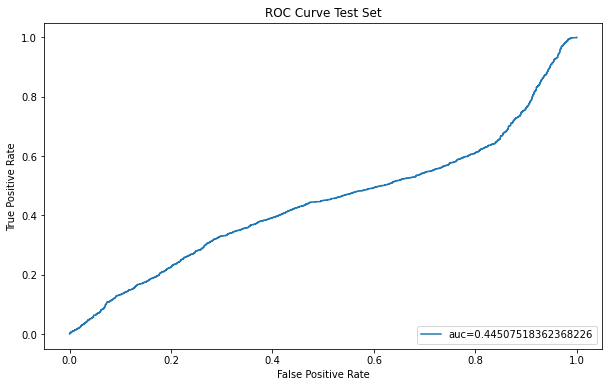

training set score: 0.6504105090311987
testing set score: 0.5165886856656742


In [73]:
# Train the Logistic Regression model on the unscaled data and print the model score
lr = LogisticRegression()
lr = evaluateModel(lr, x_train_df, y_train_df, x_test_df, y_test_df)
print("training set score:",lr.score(x_train_df, y_train_df))
print("testing set score:",lr.score(x_test_df, y_test_df))

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.70      0.49      0.58      2351
           1       0.61      0.79      0.69      2351

    accuracy                           0.64      4702
   macro avg       0.66      0.64      0.63      4702
weighted avg       0.66      0.64      0.63      4702

[[1155 1196]
 [ 491 1860]]


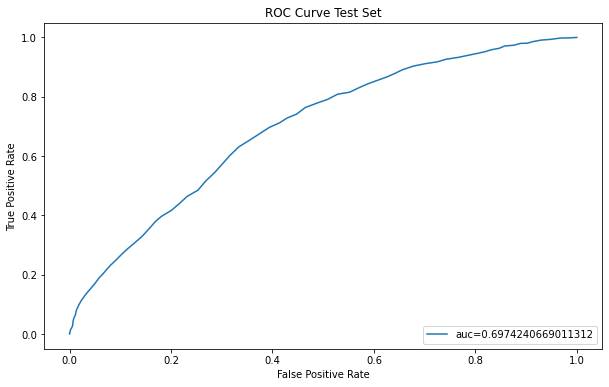

training set score: 1.0
testing set score: 0.6412165036154828


In [74]:
# Train a Random Forest Classifier model and print the model score
rf = RandomForestClassifier(random_state=42)
rf = evaluateModel(rf, x_train_df, y_train_df, x_test_df, y_test_df)
print("training set score:",rf.score(x_train_df, y_train_df))
print("testing set score:",rf.score(x_test_df, y_test_df))

In [75]:
# Scale the data
scaler = StandardScaler().fit(x_train_df)
x_train_scale = scaler.transform(x_train_df)
x_test_scale = scaler.transform(x_test_df)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6090
           1       0.73      0.66      0.69      6090

    accuracy                           0.71     12180
   macro avg       0.71      0.71      0.71     12180
weighted avg       0.71      0.71      0.71     12180

[[4596 1494]
 [2064 4026]]

Testing SET
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2351
           1       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702

[[1819  532]
 [ 562 1789]]


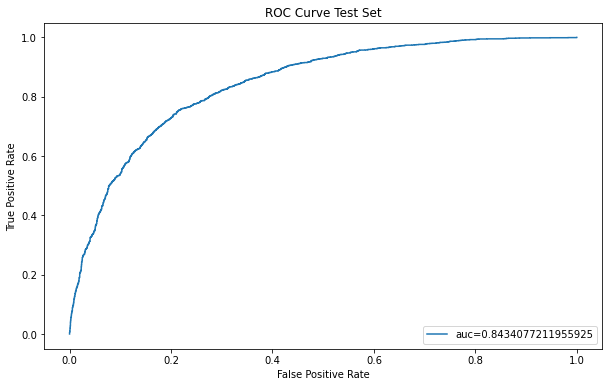

training set score with scaled feature: 0.7078817733990148
testing set score with scaled feature: 0.767333049766057


In [76]:
# Train the Logistic Regression model on the scaled data and print the model score
lr_scale = LogisticRegression()
lr_scale = evaluateModel(lr_scale, x_train_scale, y_train_df, x_test_scale, y_test_df)
print("training set score with scaled feature:",lr_scale.score(x_train_scale, y_train_df))
print("testing set score with scaled feature:",lr_scale.score(x_test_scale, y_test_df))

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6090
           1       1.00      1.00      1.00      6090

    accuracy                           1.00     12180
   macro avg       1.00      1.00      1.00     12180
weighted avg       1.00      1.00      1.00     12180

[[6090    0]
 [   0 6090]]

Testing SET
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      2351
           1       0.62      0.79      0.69      2351

    accuracy                           0.65      4702
   macro avg       0.66      0.65      0.64      4702
weighted avg       0.66      0.65      0.64      4702

[[1198 1153]
 [ 499 1852]]


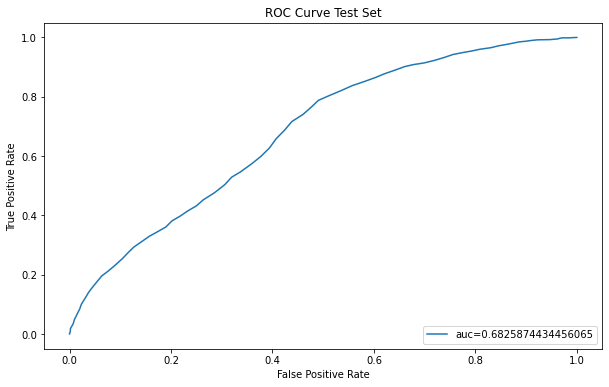

training set score with scaled feature: 1.0
testing set score with scaled feature: 0.648660144619311


In [77]:
# Train a Random Forest Classifier model on the scaled data and print the model score
rf_scale = RandomForestClassifier()
rf_scale = evaluateModel(rf_scale, x_train_scale, y_train_df, x_test_scale, y_test_df)
print("training set score with scaled feature:",rf_scale.score(x_train_scale, y_train_df))
print("testing set score with scaled feature:",rf_scale.score(x_test_scale, y_test_df))

# WRITEUP


The results are different for logsitic regression but when scaled they are the same for random forest. Random test before and after are exactly the same when data is scaled. When we did not scale the features the testing set was %53, but once we scaled the data the accuracy improved by %8. 